<a href="https://colab.research.google.com/github/kuamoto/LotoFacil_Lottery/blob/main/Lotofacil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descrição: Este programa utiliza uma rede neural artificial para prever o próximo número da Loteria LotoFacil da Caixa Econômica Federal.

In [2]:
# Importando as bibliotecas do projeto.
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Obter os dados do arquivo criado.
df = pd.read_csv ("sample_data/lotofacil.csv")
# Mostrar os dados do arquivo.
df

,JOGO,BL01
0,2066,2
1,2065,4
2,2064,6
3,2063,1
4,2062,3
...,...,...
2061,5,1
2062,4,1
2063,3,1
2064,2,1


In [4]:
# Retorna a tupla da forma (linhas, colunas) do dataframe.
df.shape

(2066, 2)

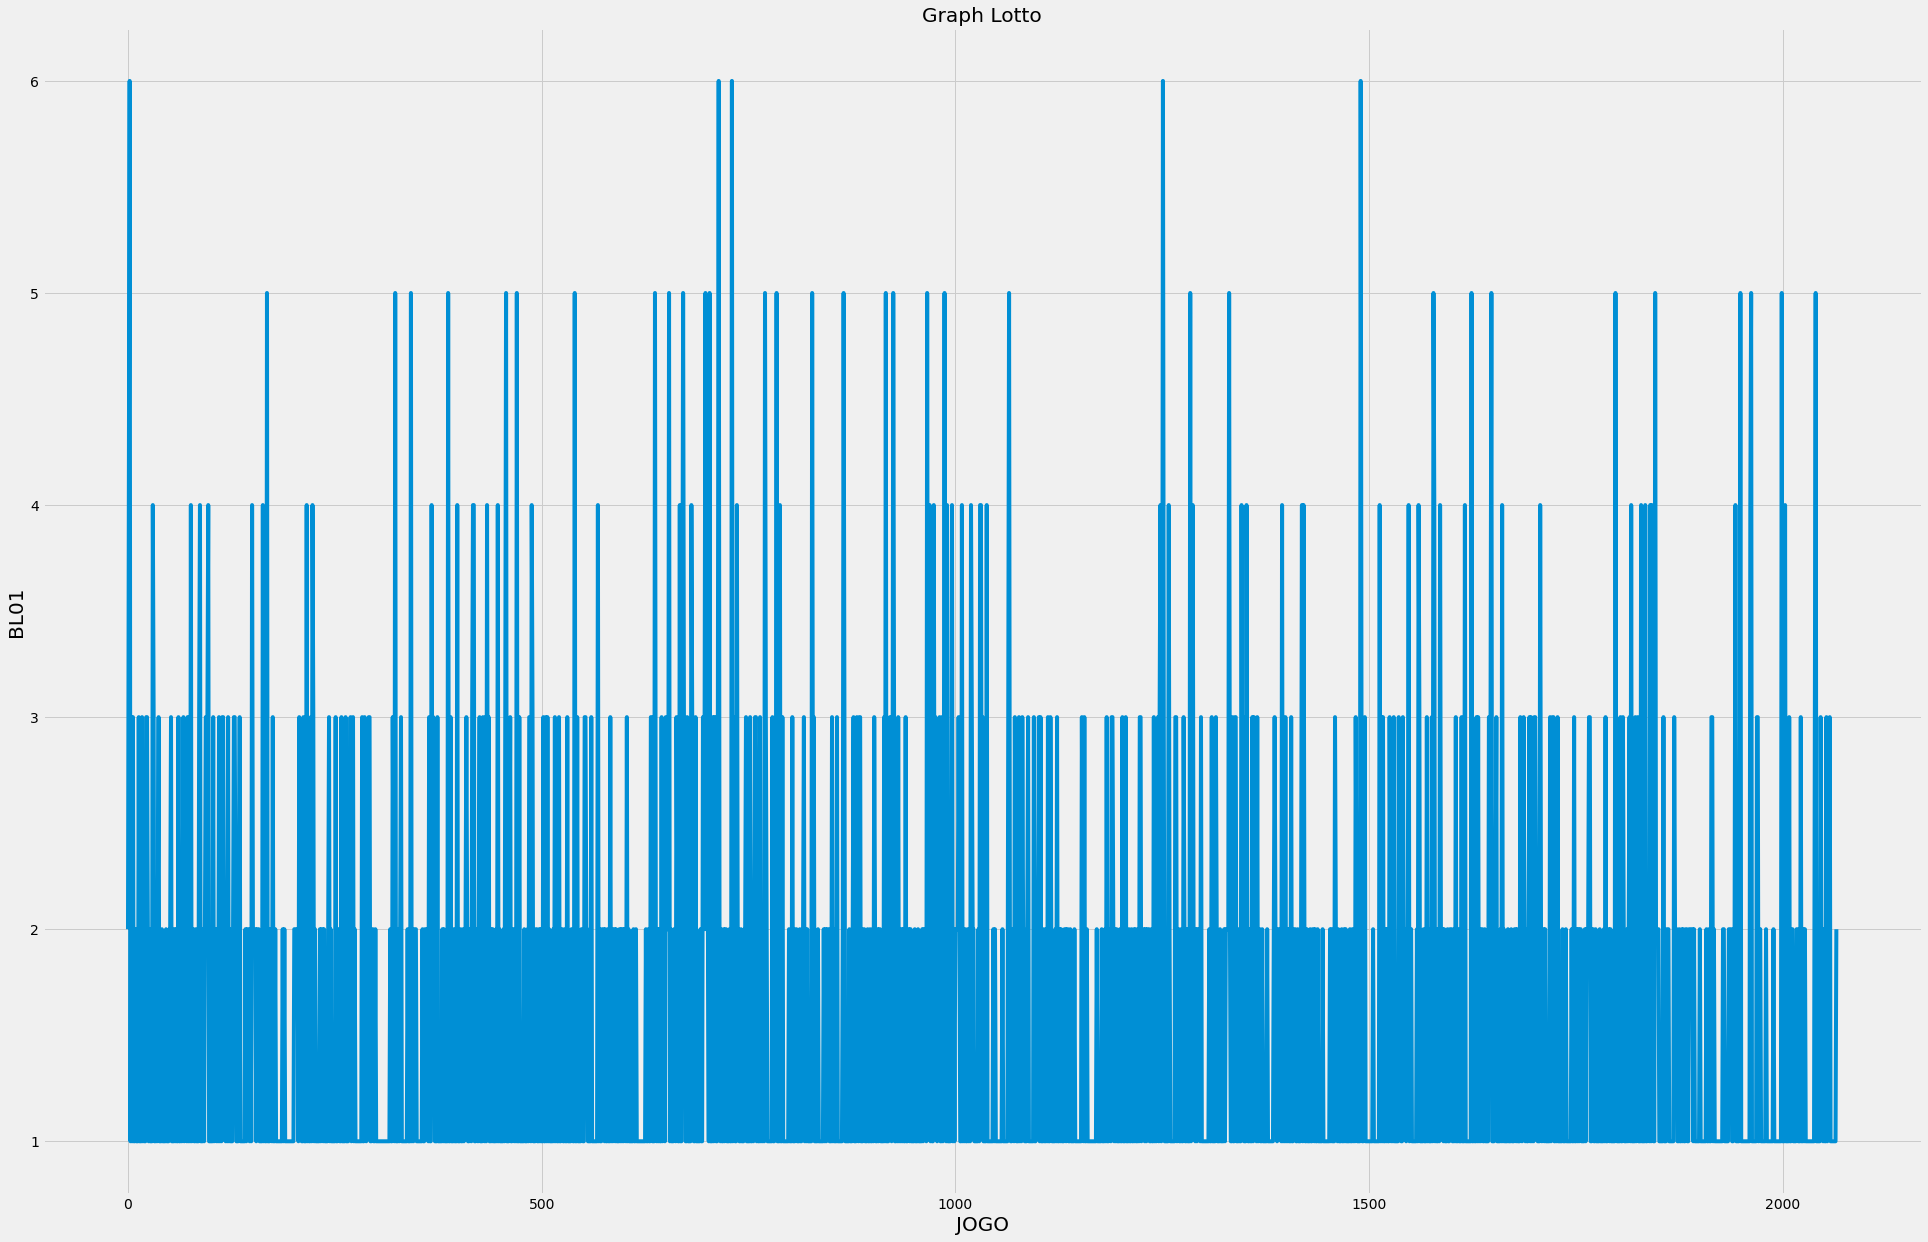

In [5]:
# Visualize o histórico de valores da bola01
plt.figure(figsize=(30,20))
plt.title('Graph Lotto')
plt.plot(df['BL01'])
plt.xlabel('JOGO',fontsize=20)
plt.ylabel('BL01',fontsize=20)
plt.show()

In [6]:
# Crie um novo dataframe apenas com a coluna 'BL01'
data = df.filter(['BL01'])
# Convertendo o dataframe em um array
dataset = data.values
# Obter/Calcular o número de linhas para treinar o modelo
training_data_len = math.ceil( len(dataset) *.8)

In [7]:
# Dimensionando todos os dados para valores entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [8]:
# Criando o conjunto de dados de treinamento em escala 
train_data = scaled_data[0:training_data_len  , : ]
# Divida os dados em conjuntos de dados x_train e y_train
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [9]:
# Converta x_train e y_train em matrizes(array)
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Remodele os dados para a forma aceita pelo LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
# Construir o modelo de rede LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
# Compile o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Treinando o model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1593/1593 [==============================] - 32s 20ms/step - loss: 0.0355


In [14]:
# Conjunto de dados de teste
test_data = scaled_data[training_data_len - 60: , : ]
# Criando os conjuntos de dados x_test e y_test
x_test = []
y_test =  dataset[training_data_len : , : ] # Pegue todas as linhas do índice para o resto e todas as colunas (neste caso, é apenas a coluna 'BL01').
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
# Converter x_test em um array
x_test = np.array(x_test)

In [16]:
# Remodele os dados para a forma aceita pelo LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [17]:
# Obter os valores de preços previstos dos modelos
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) # Desfazer escala

In [18]:
# Calcular/Obter o valor de RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.8563910724017786

In [19]:
# Plotar, Desenhar/Criar os dados para o gráfico
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


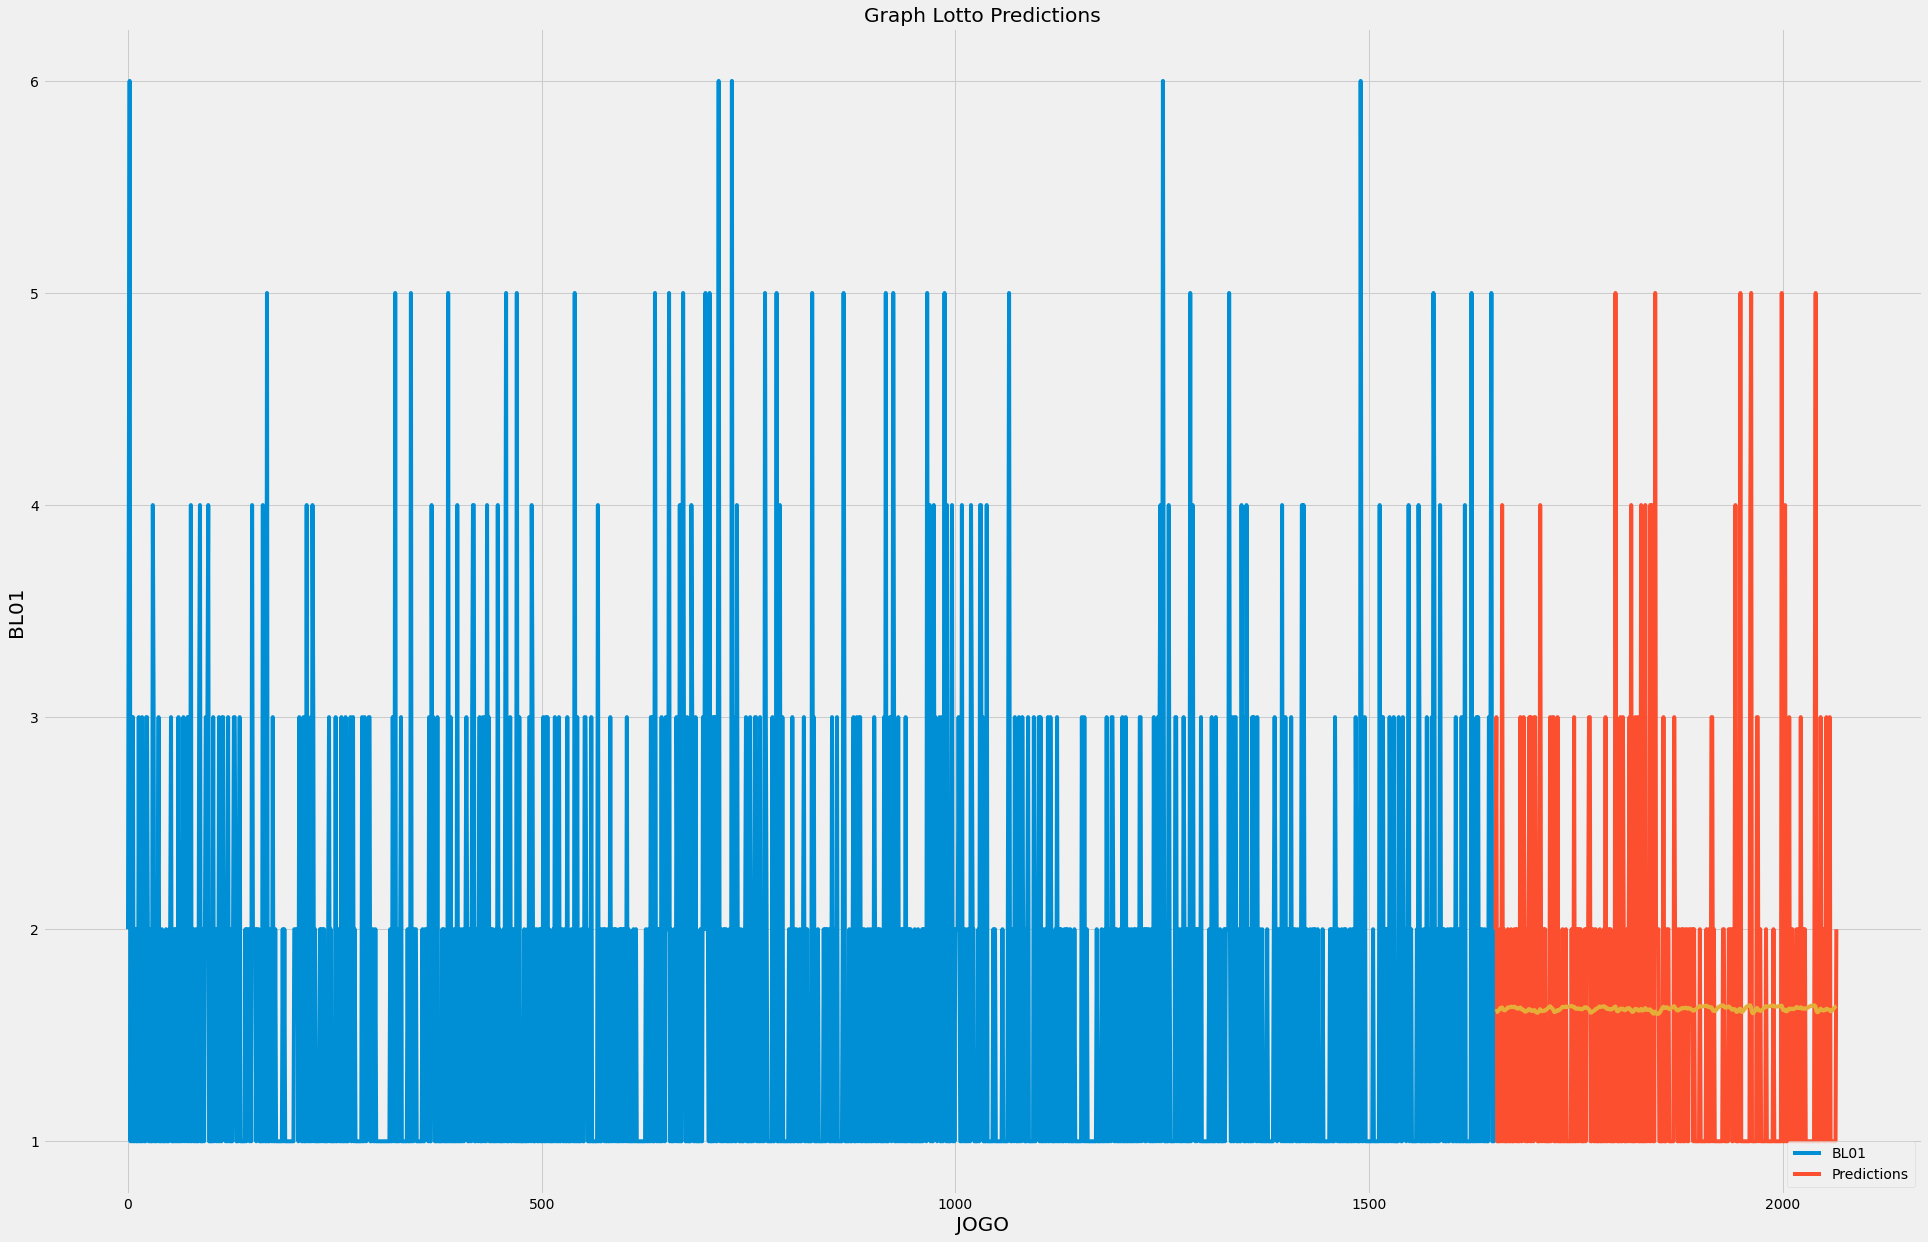

In [20]:
# Visualizando os dados
plt.figure(figsize=(30,20))
plt.title('Graph Lotto Predictions')
plt.xlabel('JOGO',fontsize=20)
plt.ylabel('BL01',fontsize=20)
plt.plot(train['BL01'])
plt.plot(valid[['BL01', 'Predictions']])
plt.legend(['BL01', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Mostrar os valores válidos e previstos
valid

,BL01,Predictions
1653,2,1.610983
1654,3,1.613200
1655,1,1.610023
1656,1,1.612836
1657,1,1.618118
...,...,...
2061,1,1.623055
2062,1,1.627952
2063,1,1.632115
2064,1,1.635374
